## Import the package into jupyter notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
import os
#print(os.listdir("free-spoken-digit-dataset-master"))

In [2]:
# import package
import librosa
import os
from os.path import isdir, join
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.io import wavfile
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
#print(tf.__version__)

### Check the data

In [4]:
# find the dataset path, and listen to the voice
# data_path = 'free-spoken-digit-dataset-master/recordings/'
data_path = 'recordings/'
import IPython
filename='0_jackson_0.wav'
IPython.display.Audio(data_path+filename)

In [5]:
# fistly, we check the shape of the wave
filename='0_jackson_0.wav'
wav, sr = librosa.load(data_path + filename)
print ('sr:', sr)
print ('wav shape:', wav.shape)
print ('length:', sr/wav.shape[0], 'secs')

sr: 22050
wav shape: (14190,)
length: 1.5539112050739958 secs


### Plot actual sound 

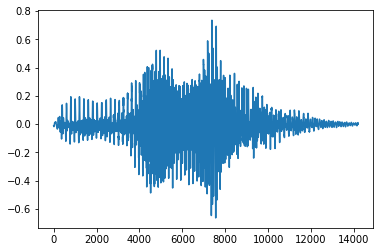

In [6]:
import matplotlib.pyplot as plt
plt.plot(wav)

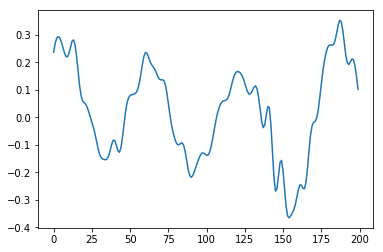

In [7]:
plt.plot(wav[4000:4200])

But first, we need to prepare our datasets. As we seen earlier, we have 2000 recordings of spoken digits by 10 classes. 

## Load data

In [17]:
X = []
y = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
i = 0
for fname in os.listdir(data_path):
    struct = fname.split('_')
    digit = struct[0]
    wav, sr = librosa.load(data_path + fname)
    padded = pad(wav, 20000)
    X.append(padded)
    y.append(digit)
    i += 1
    print (i)
X = np.vstack(X)
y = np.array(y)
print ('X:', X.shape)
print ('y:', y.shape)

## Build a  simple MLP network

In [9]:
# cope with catogorical data
  ## one-hot encoding to the output
y = to_categorical(y, 10)

In [10]:
# we split data into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
#classification
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [12]:
# hyperparameters
batch_size = 128
num_epochs = 50

In [13]:
# Specify the model
n_cols = X_train[0].shape
model = Sequential()
model.add(Dense(256, activation='relu', input_shape = (20000,)))
model.add(Dense(128, activation='relu'))  #  activation function
#model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
# Compile Model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Train Model
history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1600 samples, validate on 400 samples
Epoch 1/50
1600/1600 [==============================] - 6s 4ms/step - loss: 2.2889 - acc: 0.1306 - val_loss: 2.2646 - val_acc: 0.1475
Epoch 2/50
1600/1600 [==============================] - 3s 2ms/step - loss: 2.0442 - acc: 0.3094 - val_loss: 2.2126 - val_acc: 0.2175
Epoch 3/50
1600/1600 [==============================] - 3s 2ms/step - loss: 1.7713 - acc: 0.4669 - val_loss: 2.2040 - val_acc: 0.1925
Epoch 4/50
1600/1600 [==============================] - 3s 2ms/step - loss: 1.5100 - acc: 0.5656 - val_loss: 2.2404 - val_acc: 0.2225
Epoch 5/50
1600/1600 [==============================] - 3s 2ms/step - loss: 1.2762 - acc: 0.6481 - val_loss: 2.4018 - val_acc: 0.2125
Epoch 6/50
1600/1600 [==============================] - 3s 2ms/step - loss: 1.0844 - acc: 0.7325 - val_loss: 2.6055 - val_acc: 0.2100
Epoch 7/50
1600/1600 [==============================] - 3s 2ms/step - loss: 0.9090 - acc: 0.7888 - va

### plot the accuracy

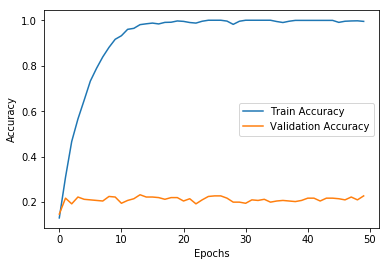

In [15]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### The appropriate activation function
relu, It’s just R(x) = max(0,x) i.e if x < 0 , R(x) = 0 and if x >= 0 , R(x) = x. Hence as seeing the mathamatical form of this function we can see that it is very simple and efficinent . A lot of times in Machine learning and computer science we notice that most simple and consistent techniques and methods are only preferred and are best. Hence it avoids and rectifies vanishing gradient problem . Almost all deep learning Models use ReLu nowadays.
#### The correct set of weights
In this model, I split the data into training data and validation data in order to avoid overfitting
#### Number of layers: 4
#### The correct  back propagation algorithm
The lost fcuntion is categorical_crossentropy, and the optimizer is RMSprop